In [1]:
using DifferentialEquations
using PyPlot
using ReactionMechanismSimulator
using DiffEqBase
using Sundials
using DiffEqSensitivity

In [2]:
chem = "/home/alon/Downloads/chem_annotated.inp";
spc_dict = "/home/alon/Downloads/species_dictionary (1).txt";

rms_file = "/home/alon/Downloads/chem57.rms";

In [10]:
max_time = 0.2;  # seconds
rop_time = 0.0015
T = 1300.0;  # K
P = 126656;  # Pa

run_sa = false;

In [4]:
# phaseDict = readinput(chem, spcdict=spc_dict)

phaseDict = readinput(rms_file);

[14:46:41] WARNING: not removing hydrogen atom without neighbors


In [5]:
spcs = phaseDict["phase"]["Species"];
rxns = phaseDict["phase"]["Reactions"];

ig = IdealGas(spcs, rxns, name="gas");

initialconds = Dict(["T" => T, "P" => P, "NH3" => 0.08, "O2" => 0.06, "Ar" => 0.086]);

domain, y0, p = ConstantTPDomain(phase=ig, initialconds=initialconds);

In [11]:
react = Reactor(domain, y0, (0.0, max_time * 1.05); p=p);

In [12]:
sol = solve(react.ode, CVODE_BDF(), abstol=1e-20, reltol=1e-12);

In [13]:
bsol = Simulation(sol,domain);

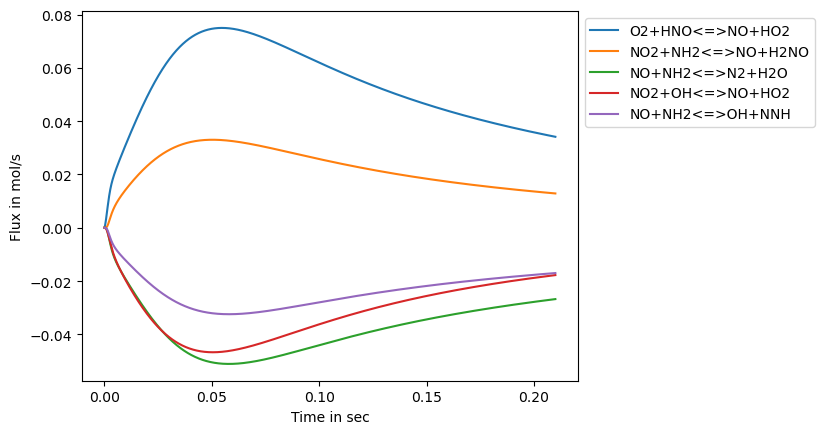

PyObject Text(0.5, 24.0, 'Time in sec')

In [33]:
plotrops(bsol, "NO", tol=0.25)

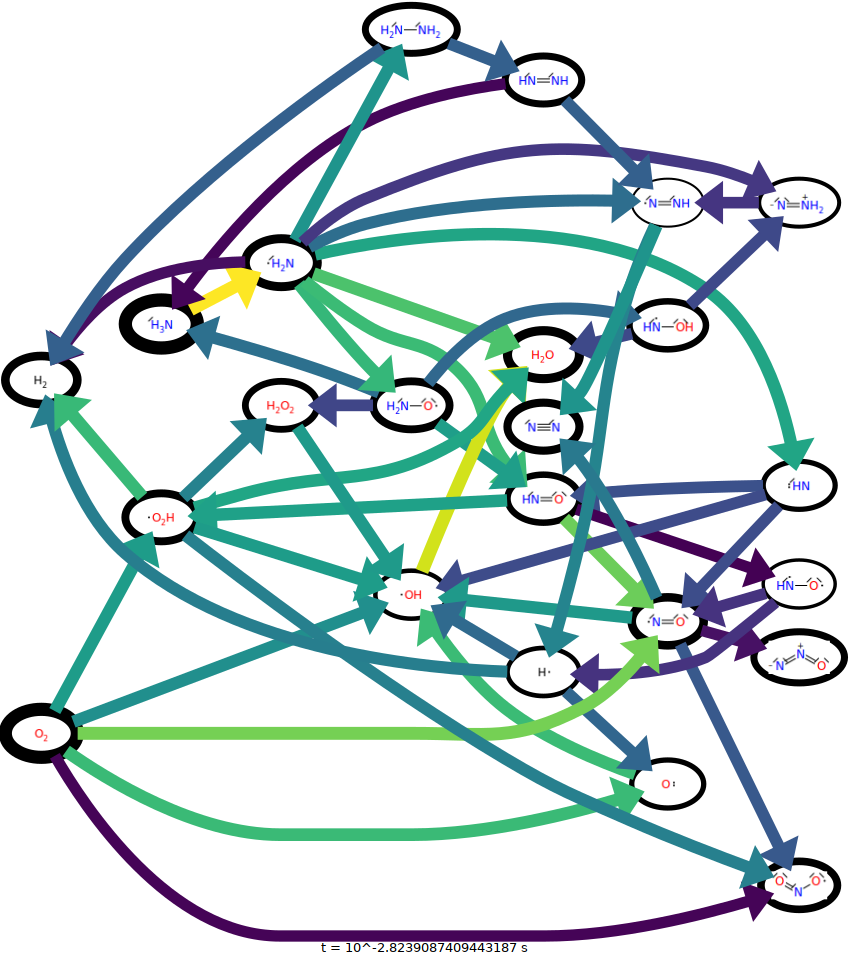

In [20]:
getfluxdiagram(bsol, rop_time, concentrationtol=1e-12, speciesratetolerance=1e-12,)